In [6]:
import ultralytics
from ultralytics import YOLO

In [7]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [8]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

# Just import these 2 modules

In [15]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

# For the classification model

In [16]:
img = cv2.imread('images/puppies.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [17]:
model = YOLO('models/yolov8n-cls.pt') 

In [18]:
target_layers =[model.model.model[-2]]

### You may get an innaccurate output at first


0: 224x224 golden_retriever 0.41, Labrador_retriever 0.30, Great_Pyrenees 0.09, kuvasz 0.04, cocker_spaniel 0.03, 4.2ms
Speed: 0.3ms preprocess, 4.2ms inference, 10.9ms postprocess per image at shape (1, 3, 224, 224)


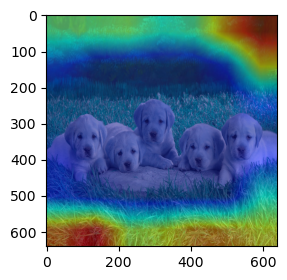

In [19]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

### SImply Re-running the cell will do the trick


0: 224x224 golden_retriever 0.41, Labrador_retriever 0.30, Great_Pyrenees 0.09, kuvasz 0.04, cocker_spaniel 0.03, 10.9ms
Speed: 0.8ms preprocess, 10.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


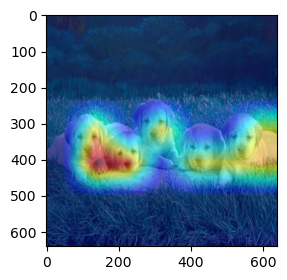

In [20]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

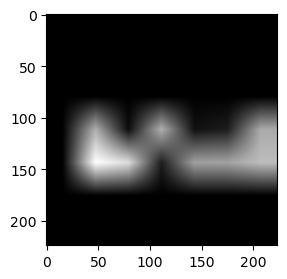

In [21]:
g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224,224))

plt.imshow(g_scale, cmap='gray')
plt.show()

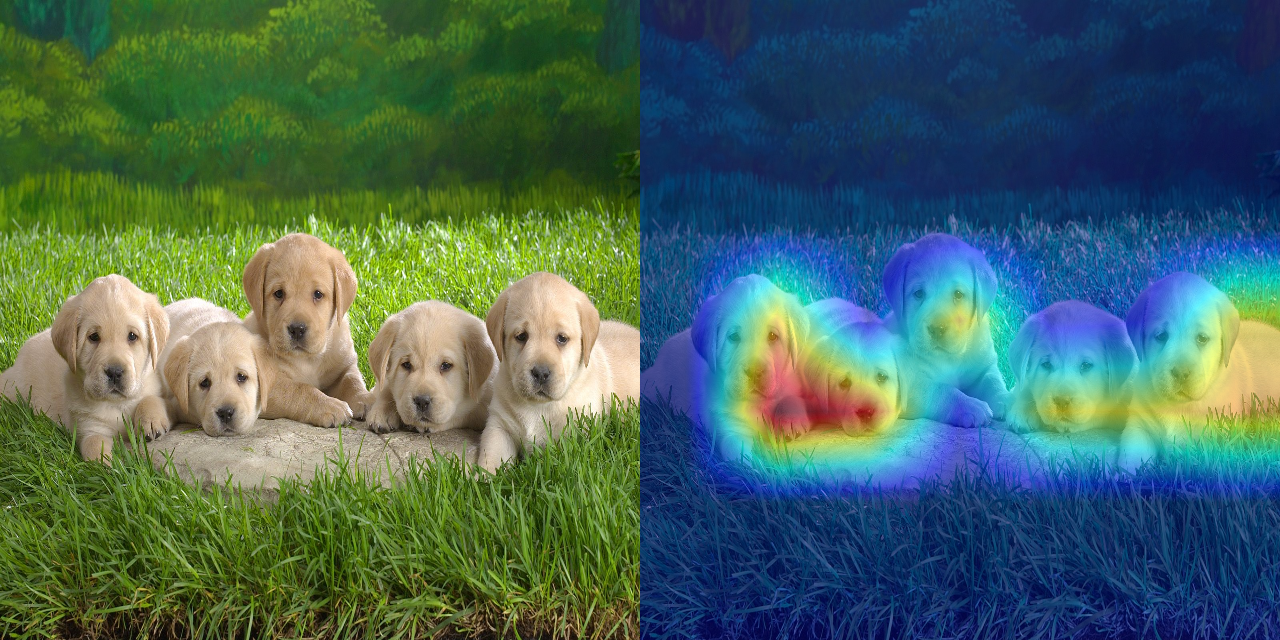

In [22]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))

# For the object detection model

In [23]:
model = YOLO('models/yolov8n.pt')

In [25]:
img = cv2.imread('images/puppies.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [26]:
target_layers =[model.model.model[-4]]


0: 640x640 7 dogs, 20.5ms
Speed: 1.6ms preprocess, 20.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


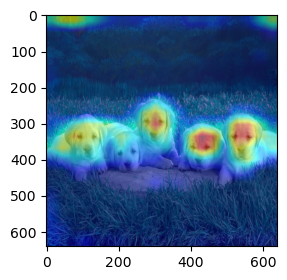

In [28]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

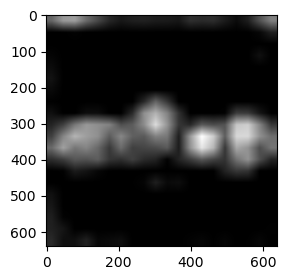

In [29]:
import matplotlib.pyplot as plt
g_scale = np.stack([grayscale_cam] * 3, axis=2)
plt.imshow(g_scale)

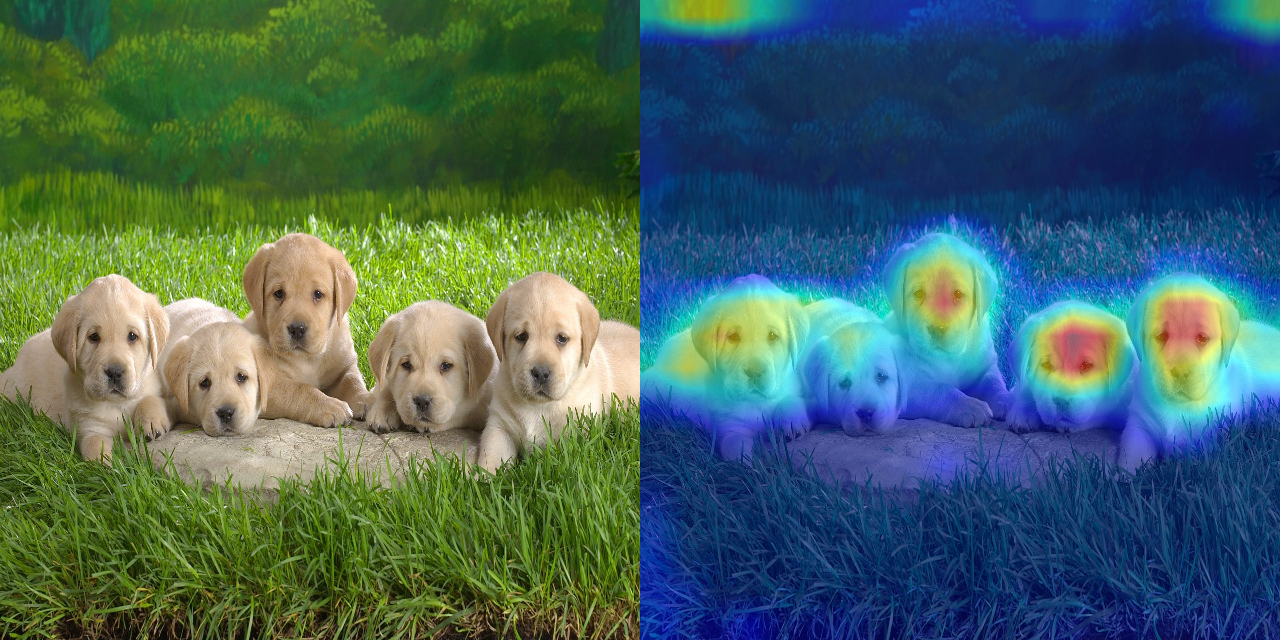

In [30]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))